In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [4]:
customers = pd.read_csv('../Customers.csv')
transactions = pd.read_csv('../Transactions.csv')

In [5]:
merged_data = pd.merge(transactions, customers, on='CustomerID', how='inner')
print(merged_data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region  SignupDate  
0      300.68  300.68   Andrea Jenkins         Europe  2022-12-03  
1      300.68  300.68  Brittany Harvey           Asia  2024-09-04  
2      300.68  300.68  Kathryn Stevens         Europe  2024-04-04  
3      601.36  300.68  Travis Campbell  South America  2024-04-11  
4      902.04  300.68    Timothy Perez         Europe  2022-03-15  


## Create a Pivot Table

In [8]:
customer_product = pd.pivot_table(
    merged_data,
    values='Quantity', 
    index='CustomerID',     
    columns='ProductID',
    fill_value=0            
)
print(customer_product.head())

ProductID   P001  P002  P003  P004  P005  P006  P007  P008  P009  P010  ...  \
CustomerID                                                              ...   
C0001        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
C0002        0.0   0.0   0.0   4.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
C0003        0.0   4.0   0.0   0.0   0.0   3.0   0.0   0.0   0.0   0.0  ...   
C0004        0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0  ...   
C0005        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

ProductID   P091  P092  P093  P094  P095  P096  P097  P098  P099  P100  
CustomerID                                                              
C0001        0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0  
C0002        0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0   0.0  
C0003        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
C0004        0.0   0.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0   0.0  
C0005   

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

## Normalize the Data

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_product)

## K-means clustering

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(scaled_data)

## Evaluate clustering

In [12]:
db_index = davies_bouldin_score(scaled_data, labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 3.9665336461409417


## Visualize

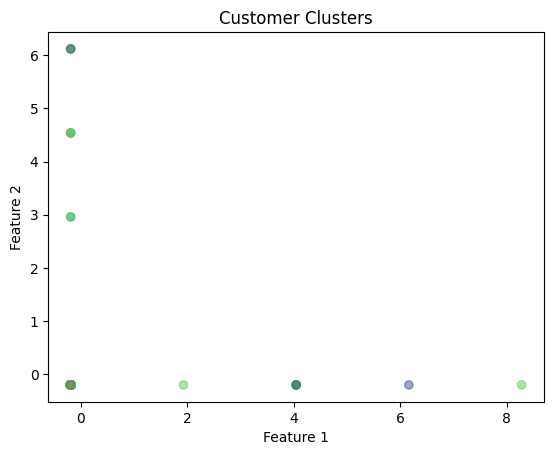

In [13]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('Customer Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()